# Airbnb listings in Barcelona - EDA

Data from http://insideairbnb.com/get-the-data.html

In [1]:
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

/home/antonia/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


### Detailed listings Airbnb Barcelona 09-02-2021

In [2]:
df_airbnb_full = pd.read_csv('./data/airbnb/listings.csv')
print(df_airbnb_full.shape)
print(df_airbnb_full.columns)
df_airbnb_full.head()

(18471, 74)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', '

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20210209201429,2021-02-10,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,...,10.0,10.0,9.0,HUTB-002062,t,19,19,0,0,0.22
1,21974,https://www.airbnb.com/rooms/21974,20210209201429,2021-02-10,Comf. double room/private bathroom,It is private double room with private bathroo...,NaN,https://a0.muscache.com/pictures/8e7c8694-f5ea...,73163,https://www.airbnb.com/users/show/73163,...,10.0,10.0,10.0,HUTB-120440,f,3,1,2,0,0.04
2,23197,https://www.airbnb.com/rooms/23197,20210209201429,2021-02-11,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,"Beautiful apartment, large terrace, 5 minutes ...",Strategically located in the Parc del Fòrum ar...,https://a0.muscache.com/pictures/738532/806da1...,90417,https://www.airbnb.com/users/show/90417,...,10.0,9.0,9.0,HUTB-005057,t,2,2,0,0,0.43
3,32711,https://www.airbnb.com/rooms/32711,20210209201429,2021-02-10,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,...,10.0,10.0,9.0,HUTB-001722,t,5,5,0,0,0.54
4,34241,https://www.airbnb.com/rooms/34241,20210209201429,2021-02-10,Private Double room - Plaza Real,<b>The space</b><br />It is a Private double r...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,https://www.airbnb.com/users/show/73163,...,9.0,8.0,7.0,Exempt,f,3,1,2,0,0.06


Let's see what's in a row of the detailed dataset:

In [3]:
import random
row = random.randint(0, df_airbnb_full.shape[0]-1)
for col in df_airbnb_full:
    print(f'{col}-> {df_airbnb_full[col][row]}\n')

id-> 11080363

listing_url-> https://www.airbnb.com/rooms/11080363

scrape_id-> 20210209201429

last_scraped-> 2021-02-10

name-> Cosy apartment close to Sagrada Familia

description-> Ideal for enjoying Barcelona with friends, family or even for business!<br /><br />This apartment is in compliance with the law being professionally managed by our family business ES-FLATS (Aurélie & Eberhard), we check the flat before and after each stay and manage cleaning and maintenance with a professional team.<br />We have all the official licenses and insurances required to exercise the touristic rental, which is mandatory in Catalunya.<br /><br /><b>The space</b><br />This spacious and comfortable 3 bedrooms apartment (two with a double bed, one with an individual bed and one single sofa bed), a complete bathroom with shower and spacious  living room, very bright and overlooking the street.<br />Fully renovated with new furniture.  The kitchen is fully equipped and the living room has sofa, TV, W

### Simplified listings Airbnb Barcelona - 09-02-2021

In [4]:
df_airbnb_2020= pd.read_csv('./data/airbnb/listings_summ.csv')
print(df_airbnb_2020.shape)
print(df_airbnb_2020.columns)
df_airbnb_2020.head()

(18471, 16)
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,116,1,21,2019-11-01,0.22,19,80
1,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37973,2.17631,Private room,80,3,2,2017-11-06,0.04,3,69
2,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,200,3,52,2019-12-15,0.43,2,326
3,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,79,2,63,2020-02-22,0.54,5,0
4,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37916,2.17535,Private room,40,30,8,2013-07-15,0.06,3,40


### Simplified listings Airbnb Barcelona - 30-04-2015

In [5]:
df_airbnb_2015 = pd.read_csv('./data/airbnb/listings_30-04-2015.csv')
print(df_airbnb_2015.shape)
print(df_airbnb_2015.columns)

(12033, 16)
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


### Geojson for neighborhoods in Barcelona

In [6]:
barcelona = geopandas.read_file("./data/geojson/neighborhoods.geojson")
print(barcelona.shape)
print(barcelona.columns)
barcelona.head()

(73, 47)
Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1',
       'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID',
       'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_QGIS', 'VALOR1QGIS', 'VALOR2QGIS',
       'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR', 'COL_DESCR', 'HEX_COLOR7',
       'geometry'],
      dtype='object')


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,0,Sòlid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
1,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,0,Sòlid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((2.17701 41.38525, 2.17873 41.38396, ..."
2,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,0,Sòlid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((2.19623 41.38745, 2.19631 41.38745, ..."
3,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,0,Sòlid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((2.17091 41.40182, 2.17221 41.40083, ..."
4,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,0,Sòlid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((2.15736 41.39331, 2.15847 41.39245, ..."


In [7]:
barcelona.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Plot every Airbnb housing in Barcelona's map

In [8]:
# We have latitude and longitude in the airbnb dataframe
print(f"NaN for latitude: {df_airbnb_2020['latitude'].isna().sum()}")
print(f"NaN for longitude: {df_airbnb_2020['longitude'].isna().sum()}")

NaN for latitude: 0
NaN for longitude: 0


In [9]:
# Let's convert this into a geometry (points)
geo_df_airbnb_2020 = geopandas.GeoDataFrame(df_airbnb_2020, 
                                       crs=barcelona.crs, 
                                       geometry=geopandas.points_from_xy(df_airbnb_2020.longitude, df_airbnb_2020.latitude))

/home/antonia/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

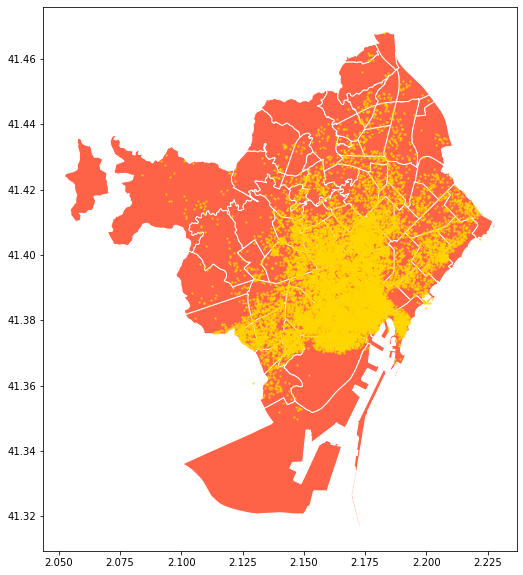

In [10]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_aspect('equal')
barcelona.plot(column='BARRI', color='tomato', edgecolor='white', ax=ax)
geo_df_airbnb_2020.plot(marker='o', alpha=0.6, color='gold', markersize=2, ax=ax)

### Compare the number of housings per neighborhood in 2015 with the number for 2020

In [11]:
# to plot color-grading per neighborhood, i need:
# -number of housings per neighborhood
# -barcelona neighborhoods geometry, associated with their names

In [12]:
print(f"NaN in 'neighborhood' 2015: {df_airbnb_2015['neighbourhood'].isna().sum()}")
print(f"NaN in 'neighborhood' 2020: {df_airbnb_2020['neighbourhood'].isna().sum()}")

NaN in 'neighborhood' 2015: 0
NaN in 'neighborhood' 2020: 0


In [13]:
geo_barcelona = barcelona[['BARRI', 'NOM', 'geometry']]

housings_per_neigh_2015 = df_airbnb_2015[['id','neighbourhood']].groupby(by='neighbourhood').count().reset_index()
housings_per_neigh_2015.columns = ['neighbourhood', 'housing_count']

housings_per_neigh_2020 = df_airbnb_2020[['id','neighbourhood']].groupby(by='neighbourhood').count().reset_index()
housings_per_neigh_2020.columns = ['neighbourhood', 'housing_count']
housings_per_neigh_2020

,neighbourhood,housing_count
0,Baró de Viver,1
1,Can Baró,42
2,Can Peguera,4
3,Canyelles,2
4,Ciutat Meridiana,7
...,...,...
67,la Vila Olímpica del Poblenou,182
68,la Vila de Gràcia,947
69,les Corts,253
70,les Roquetes,25


In [14]:
merged_2015 = geo_barcelona.merge(housings_per_neigh_2015, left_on='NOM', right_on='neighbourhood', how='outer')
merged_2015.head()

,BARRI,NOM,geometry,neighbourhood,housing_count
0,01,el Raval,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ...",el Raval,1134.0
1,02,el Barri Gòtic,"POLYGON ((2.17701 41.38525, 2.17873 41.38396, ...",el Barri Gòtic,924.0
2,03,la Barceloneta,"POLYGON ((2.19623 41.38745, 2.19631 41.38745, ...",la Barceloneta,266.0
3,07,la Dreta de l'Eixample,"POLYGON ((2.17091 41.40182, 2.17221 41.40083, ...",la Dreta de l'Eixample,1053.0
4,08,l'Antiga Esquerra de l'Eixample,"POLYGON ((2.15736 41.39331, 2.15847 41.39245, ...",l'Antiga Esquerra de l'Eixample,714.0


In [15]:
merged_2020 = geo_barcelona.merge(housings_per_neigh_2020, left_on='NOM', right_on='neighbourhood', how='outer')
merged_2020.head()

,BARRI,NOM,geometry,neighbourhood,housing_count
0,01,el Raval,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ...",el Raval,1374.0
1,02,el Barri Gòtic,"POLYGON ((2.17701 41.38525, 2.17873 41.38396, ...",el Barri Gòtic,1274.0
2,03,la Barceloneta,"POLYGON ((2.19623 41.38745, 2.19631 41.38745, ...",la Barceloneta,436.0
3,07,la Dreta de l'Eixample,"POLYGON ((2.17091 41.40182, 2.17221 41.40083, ...",la Dreta de l'Eixample,2112.0
4,08,l'Antiga Esquerra de l'Eixample,"POLYGON ((2.15736 41.39331, 2.15847 41.39245, ...",l'Antiga Esquerra de l'Eixample,1034.0


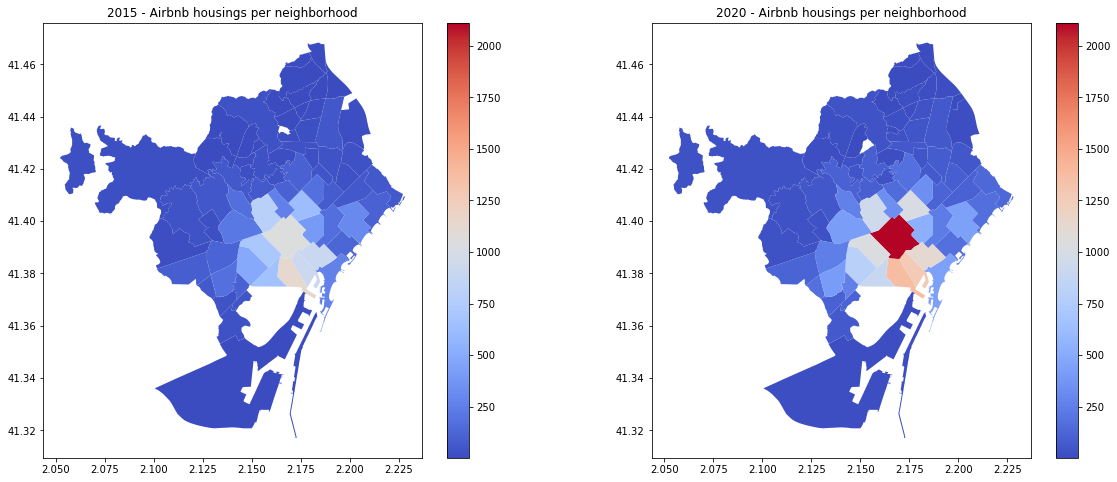

In [16]:
# calculate the minimum count for 2015 and 2020, and the maximum count for 2015 and 2020, to make the side bars equal
vmin = merged_2015['housing_count'].min() if merged_2015['housing_count'].min() < merged_2020['housing_count'].min() else merged_2020['housing_count'].min()
vmax = merged_2015['housing_count'].max() if merged_2015['housing_count'].max() > merged_2020['housing_count'].max() else merged_2020['housing_count'].max()


fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(1,2,1)
ax.set_aspect('equal')
merged_2015.plot(column='housing_count', cmap='coolwarm', vmin=vmin, vmax=vmax, legend=True, ax=ax)
plt.title('2015 - Airbnb housings per neighborhood')

ax = fig.add_subplot(1,2,2)
ax.set_aspect('equal')
merged_2020.plot(column='housing_count', cmap='coolwarm', vmin=vmin, vmax=vmax, legend=True, ax=ax)
_ = plt.title('2020 - Airbnb housings per neighborhood')


In [17]:
print(f"Neighborhood with more Airbnb housings for 2015: {merged_2015[merged_2015['housing_count'] == merged_2015['housing_count'].max()]['NOM'].values[0]}")
print(f"Neighborhood with more Airbnb housings for 2020: {merged_2020[merged_2020['housing_count'] == merged_2020['housing_count'].max()]['NOM'].values[0]}")

Neighborhood with more Airbnb housings for 2015: el Raval
Neighborhood with more Airbnb housings for 2020: la Dreta de l'Eixample


### By how much has increased the number of housings in every district?

In [18]:
for district in df_airbnb_2015['neighbourhood_group'].unique():
    housing_count_eixample_2015 = df_airbnb_2015[df_airbnb_2015['neighbourhood_group'] == district]['id'].count()
    housing_count_eixample_2020 = df_airbnb_2020[df_airbnb_2020['neighbourhood_group'] == district]['id'].count()
    print(f'The number of Airbnb housings in {district} for 2020 has grown a {(housing_count_eixample_2020 - housing_count_eixample_2015)*100 / housing_count_eixample_2015:.1f}% compared to 2015')

The number of Airbnb housings in Sarrià-Sant Gervasi for 2020 has grown a 56.6% compared to 2015
The number of Airbnb housings in Eixample for 2020 has grown a 62.4% compared to 2015
The number of Airbnb housings in Sant Martí for 2020 has grown a 62.9% compared to 2015
The number of Airbnb housings in Horta-Guinardó for 2020 has grown a 70.7% compared to 2015
The number of Airbnb housings in Ciutat Vella for 2020 has grown a 30.5% compared to 2015
The number of Airbnb housings in Gràcia for 2020 has grown a 24.3% compared to 2015
The number of Airbnb housings in Sants-Montjuïc for 2020 has grown a 87.5% compared to 2015
The number of Airbnb housings in Les Corts for 2020 has grown a 76.4% compared to 2015
The number of Airbnb housings in Nou Barris for 2020 has grown a 146.7% compared to 2015
The number of Airbnb housings in Sant Andreu for 2020 has grown a 74.4% compared to 2015


## Variable distributions

First, discern which variables are continuous, categorical and non-numerical

In [19]:
def discern_variables(df):
    threshold = 0.01
    continuous_variables = []
    categorical_variables = []
    
    for column in df:
        is_categorical = (df[column].nunique()/df[column].count()) < threshold
        if is_categorical:
            categorical_variables.append(column)
        else:
            continuous_variables.append(column)
    return categorical_variables, continuous_variables

cat_vars, cont_vars = discern_variables(df_airbnb_full)
print(f'categorical variables: {cat_vars}\n')
print(f'continuous variables: {cont_vars}\n')

categorical variables: ['scrape_id', 'last_scraped', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_ro

<ipython-input-19-2893ac50c005>:7: RuntimeWarning: invalid value encountered in long_scalars
  is_categorical = (df[column].nunique()/df[column].count()) < threshold


In [20]:
non_num_vars = df_airbnb_full.select_dtypes(exclude='number').columns.to_list()
print(f'non numerical variables: {non_num_vars}')

non numerical variables: ['listing_url', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable']


<br/>Create a numeric variable with the price:

In [21]:
# price is non-numeric, so I'm going to change that, and append this column to the continuous variables
def str_to_float(row):
    price = row['price'].split('$')[1]
    price = price.replace(',', '')

    return float(price)

df_airbnb_full['price_num'] = df_airbnb_full.apply(str_to_float, axis=1)
cont_vars.append('price_num')

### Plot the continuous variables

<ipython-input-22-fb3dc511708c>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  _ = df_airbnb_full[cont_vars].hist(ax=ax, color='tomato', edgecolor='white')


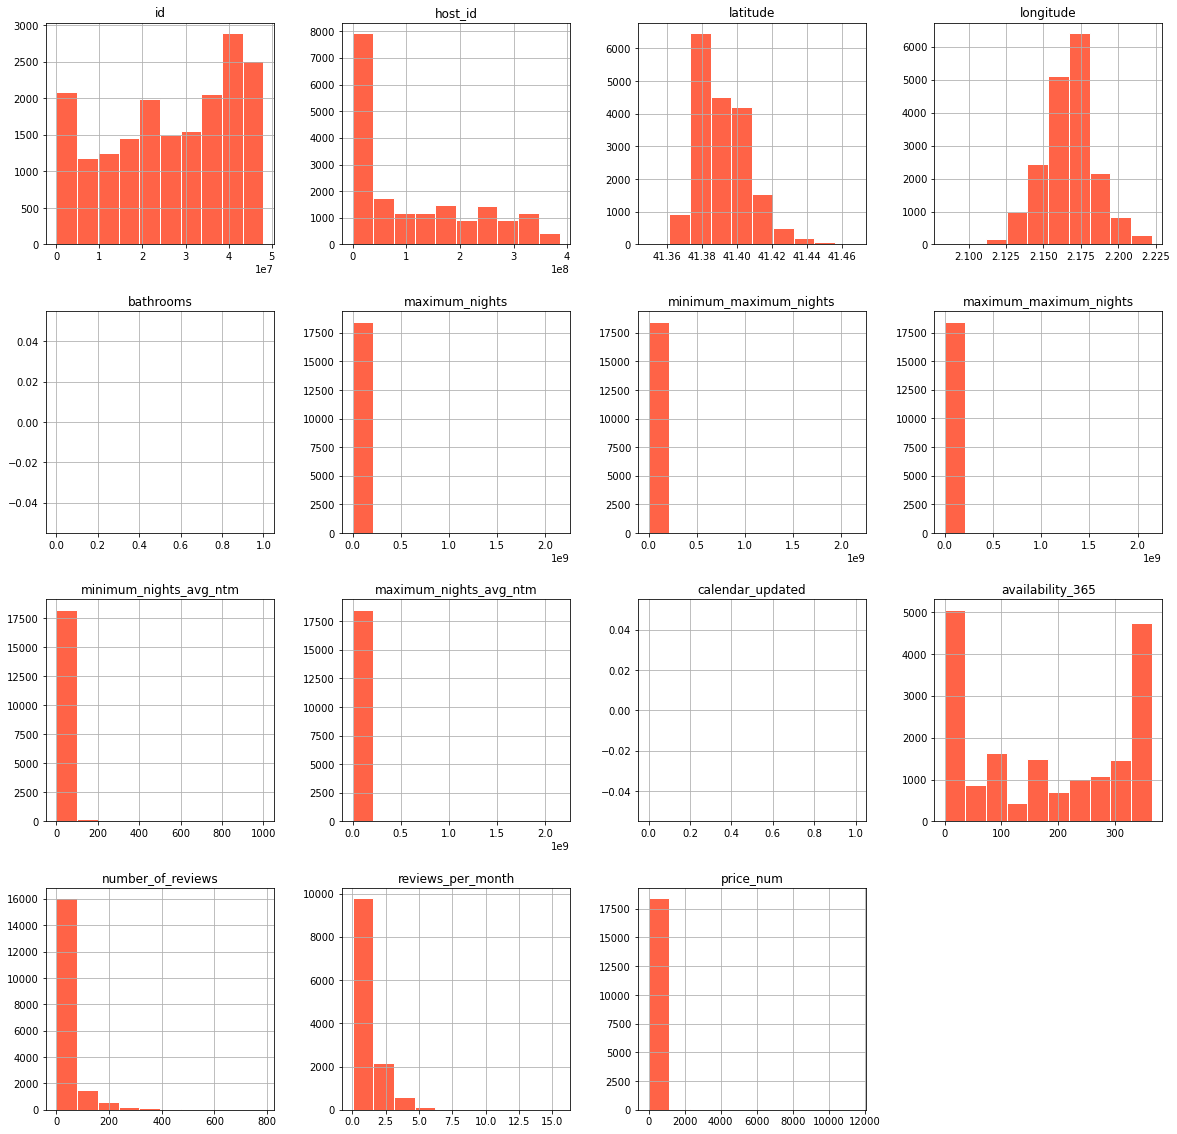

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))
_ = df_airbnb_full[cont_vars].hist(ax=ax, color='tomato', edgecolor='white')

### Plot some categorical variables

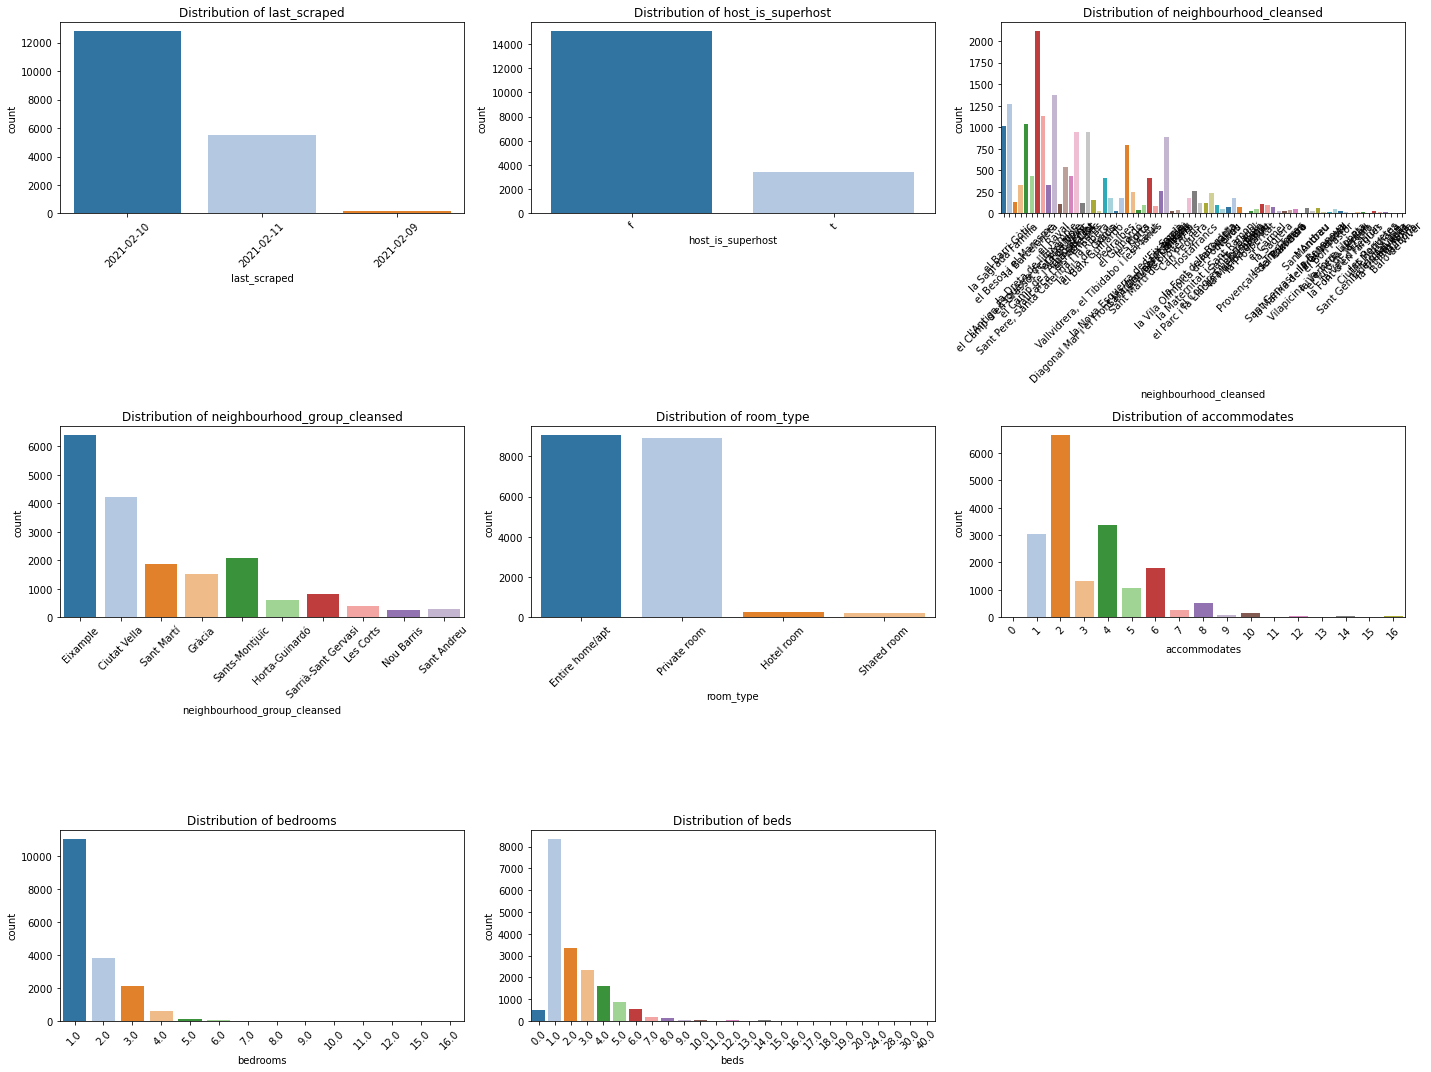

In [23]:
cat_vars_subset = ['last_scraped', 'host_is_superhost', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bedrooms', 'beds']

n_cols = 3
n_rows = int(np.ceil(len(cat_vars_subset) / n_cols))

fig = plt.figure(figsize=(20, 15))

for i, variable in enumerate(cat_vars_subset):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=variable, data=df_airbnb_full, palette='tab20', ax=ax)
    plt.xticks(rotation=45)
    ax.set_title(f'Distribution of {variable}')

plt.tight_layout() 

</br>Let's see the number of listings per host:

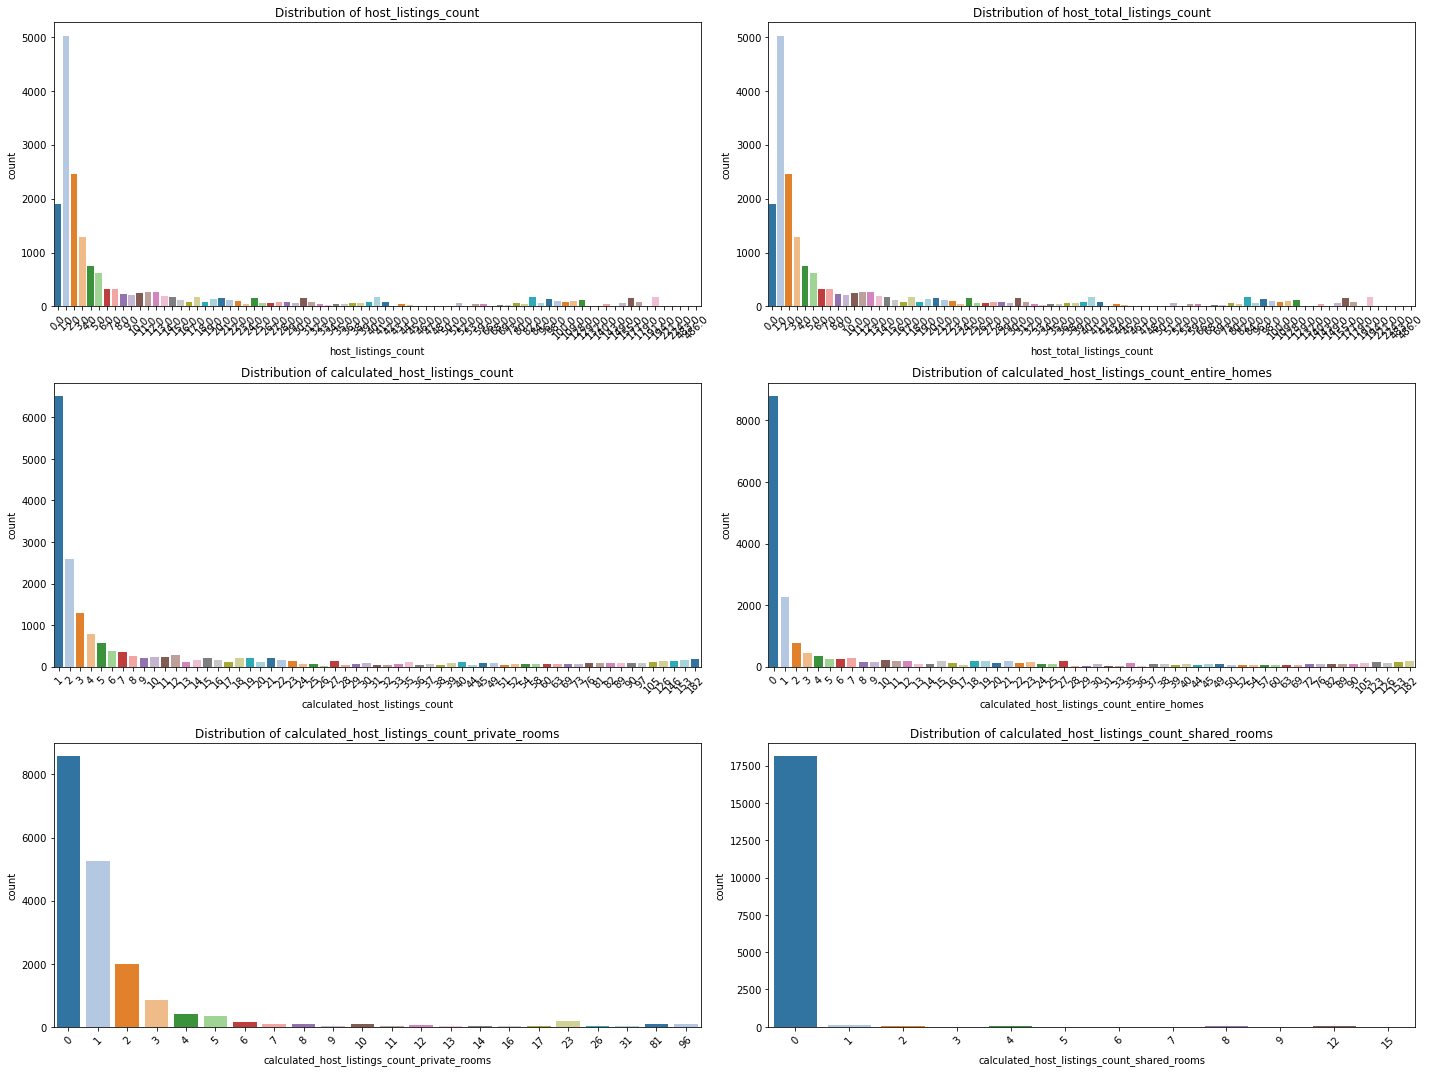

In [24]:
cat_vars_subset2 = ['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

n_cols = 2
n_rows = int(np.ceil(len(cat_vars_subset2) / n_cols))

fig = plt.figure(figsize=(20, 15))

for i, variable in enumerate(cat_vars_subset2):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=variable, data=df_airbnb_full, palette='tab20', ax=ax)
    plt.xticks(rotation=45)
    ax.set_title(f'Distribution of {variable}')

plt.tight_layout() 

</br>Who is the host with the most housings?

In [25]:
df_airbnb_full[df_airbnb_full['host_listings_count'] == df_airbnb_full['host_listings_count'].max()][['name', 'host_name', 'neighbourhood_group_cleansed', 'room_type', 'availability_365', 'price']]

,name,host_name,neighbourhood_group_cleansed,room_type,availability_365,price
10225,Nice Apartment La Sagrera - in a very Quiet Zone,Your.Rentals,Sant Andreu,Entire home/apt,294,$215.00
10226,Big Flat In a very quiet area and well connected,Your.Rentals,Sant Andreu,Entire home/apt,280,$223.00
10915,Spacious apartment for families near Park Guell,Your.Rentals,Gràcia,Entire home/apt,1,$123.00
10916,Spacious and modern apartment,Your.Rentals,Eixample,Entire home/apt,341,$119.00
15937,Born Rustic Style 1.1 Apt,Your.Rentals,Ciutat Vella,Entire home/apt,309,$86.00
16457,Central Born Apt 3.1,Your.Rentals,Ciutat Vella,Entire home/apt,331,$85.00
16469,Two Bedroom Apartment in the heart of the Born...,Your.Rentals,Ciutat Vella,Entire home/apt,363,$72.00
16470,Central Loft Ground Floor St.Caterina Entrance,Your.Rentals,Ciutat Vella,Entire home/apt,352,$66.00
16472,Central Mini Studio 4.3 El Born,Your.Rentals,Ciutat Vella,Entire home/apt,202,$56.00
16473,Comfortable Apt Born 4.1,Your.Rentals,Eixample,Entire home/apt,357,$96.00


</br>Let's see how the hosts with multiple (>100) housings behave:

In [26]:
more_than_100_listings = df_airbnb_full[df_airbnb_full['host_listings_count'] > 100]

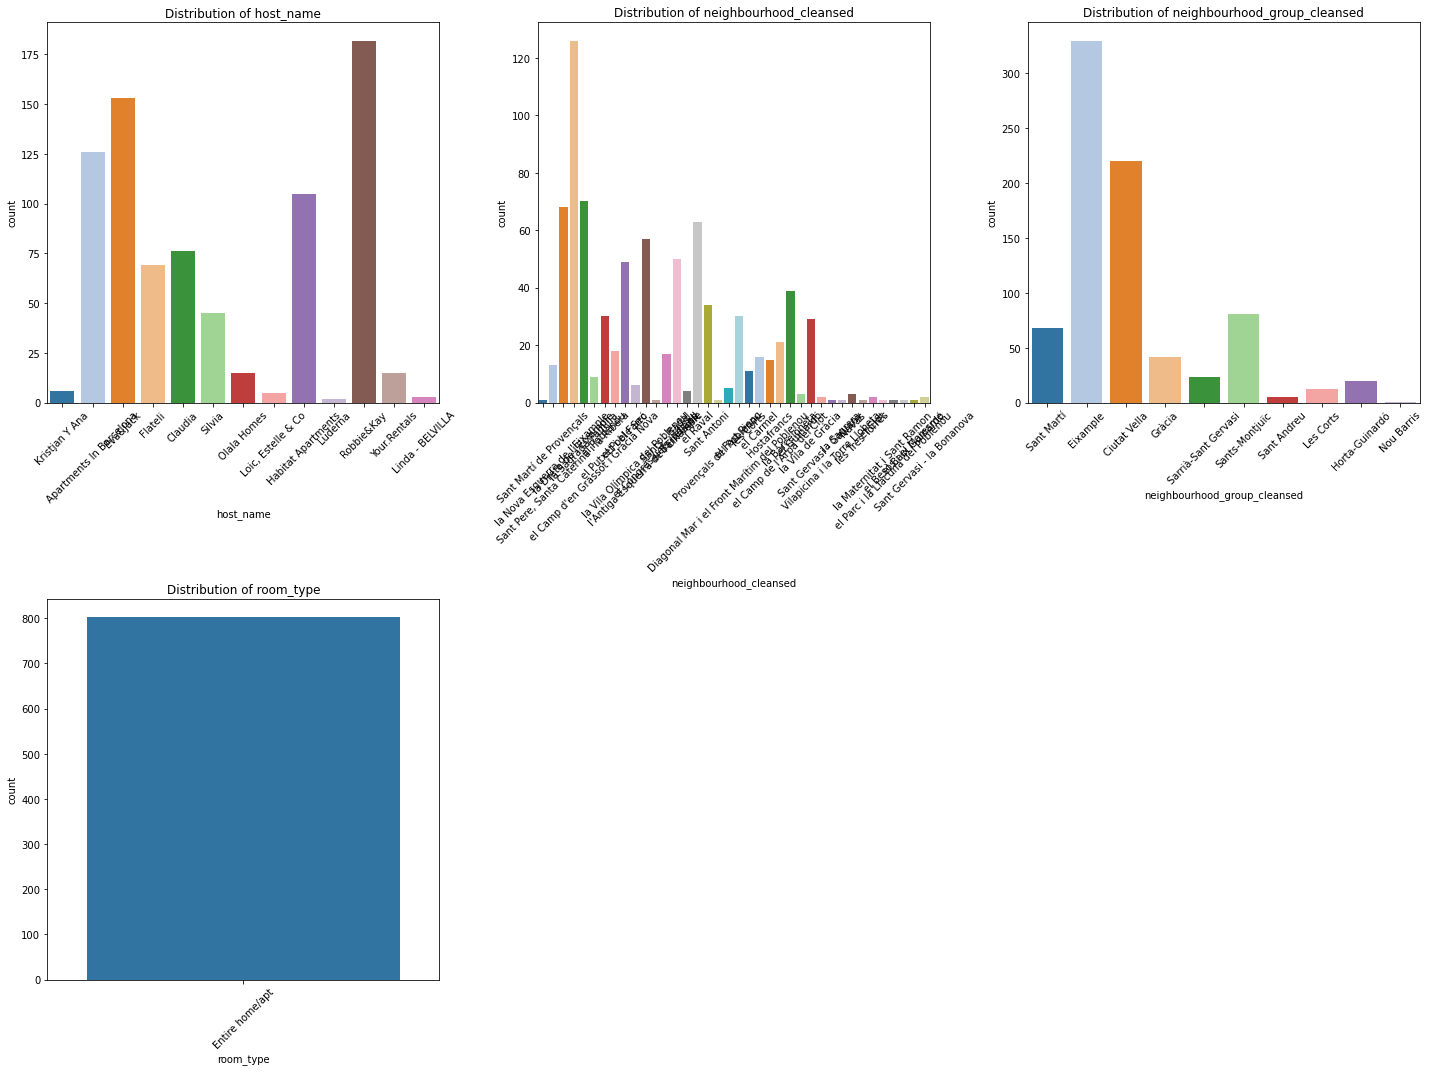

In [27]:
variables = ['host_name', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type']

n_cols = 3
n_rows = int(np.ceil(len(variables) / n_cols))

fig = plt.figure(figsize=(20, 15))

for i, variable in enumerate(variables):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=variable, data=more_than_100_listings, palette='tab20', ax=ax)
    plt.xticks(rotation=45)
    ax.set_title(f'Distribution of {variable}')

plt.tight_layout() 

### How are the prices per person distributed?

In [28]:
# calculate the price per accomodated person in an airbnb housing
def price_per_person(row):
    price = row['price'].split('$')[1]
    price = price.replace(',', '')

    price_float = float(price)
    accom_float = float(row['accommodates'])

    ppp = price_float / accom_float if (accom_float != 0 and price_float != 0) else np.nan
    return ppp
    
    
df_airbnb_full['price_per_person'] = df_airbnb_full.apply(price_per_person, axis=1)

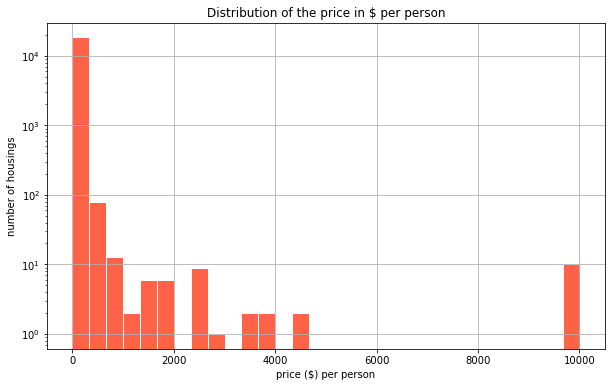

In [29]:
df_airbnb_full['price_per_person'].hist(bins=30, figsize=(10,6), color='tomato', edgecolor='white')
plt.xlabel('price ($) per person')
plt.ylabel('number of housings')
plt.title('Distribution of the price in $ per person')
plt.yscale('log')

## Conclusions

- The districts with more number of housings are Eixample and Ciutat Vella. Ciutat Vella contains the oldest neighborhoods in the city of Barcelona, and Eixample concentrates a lot of modernist architecture, including Sagrada Familia
- The number of housings in Eixample increased from 2015 to 2020 a 62.4%, and in Nou Barris, a 146.7%!
- Most of the hosts offer just one housing in Airbnb, but there are some with multiple listings (the maximum, 486 listings for one host)
- Somethings very strange: there are hosts that offer multiple (for example 96!) private rooms
- Hosts with more than 100 housings offer exclusively entire houses/flats, not rooms 